In [2]:
!pip3 install matplotlib numpy tf-nightly tensorflow_hub pillow

In [3]:
from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as tf_hub
import PIL

def load_image(image_path, image_size=(512, 256)):
    img = tf.io.decode_image(
      tf.io.read_file(image_path),
      channels=3, dtype=tf.float32)[tf.newaxis, ...]
    img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
    return img

def visualize(images, titles=('',)):
    noi = len(images)
    image_sizes = [image.shape[1] for image in images]
    w = (image_sizes[0] * 6) // 320
    plt.figure(figsize=(w  * noi, w))
    grid_look = gridspec.GridSpec(1, noi, width_ratios=image_sizes)
    
    for i in range(noi):
        plt.subplot(grid_look[i])
        plt.imshow(images[i][0], aspect='equal')
        plt.axis('off')
        plt.title(titles[i])
        plt.savefig("final.jpg")
    plt.show()

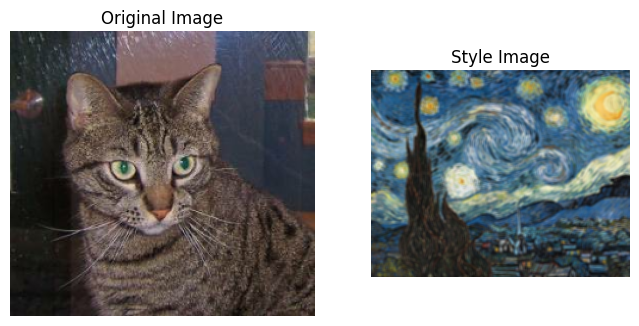

In [4]:
original_image = load_image("data/training_set/cats/cat.1.jpg")
style_image = load_image("data/styles/stary_night.jpg")
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='VALID')
visualize([original_image, style_image], ['Original Image', 'Style Image'])

2023-05-01 17:34:07.423573: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


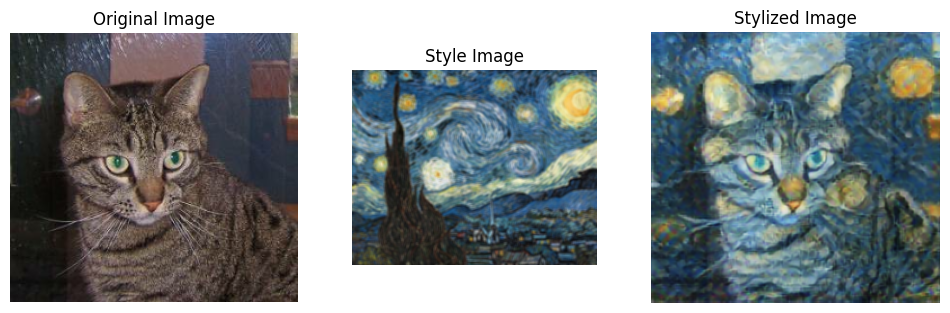

In [5]:
stylize_model = tf_hub.load('tf_model')
results = stylize_model(tf.constant(original_image), tf.constant(style_image))
stylized_photo = results[0]
visualize([original_image, style_image, stylized_photo], titles=['Original Image', 'Style Image', 'Stylized Image'])

In [44]:
# Importing the necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


training_dir = 'data/training_set'
augmented_training_dir = 'data/augmented_training_set'

# Function to load images and labels
def load_images_and_labels(categories, dir):
    img_lst = []
    labels = []
    image_size = (512, 256)
    for index, category in enumerate(categories):
        for image_name in os.listdir(dir + "/" + category):
            image_dir = dir + "/" + category + "/" + image_name
            try:
                img = tf.io.decode_image(tf.io.read_file(image_dir), channels=3, dtype=tf.float32)[tf.newaxis, ...]
                img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
                img_lst.append(img)
                labels.append(index)
            except Exception as e:
                print(f'Image not loaded: {dir}/{category}/{image_name}')
                print(f'Error: {e}')
    return img_lst, labels

# Load the original dataset
categories = ['dogs', 'cats'] # replace with your actual categories
training_data, training_labels = load_images_and_labels(categories, training_dir)



Image not loaded: data/training_set/dogs/.DS_Store
Error: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage]
Image not loaded: data/training_set/dogs/_DS_Store
Error: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage]
Image not loaded: data/training_set/cats/.DS_Store
Error: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage]
Image not loaded: data/training_set/cats/_DS_Store
Error: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage]


In [43]:
# Path to the styles and output directories
styles_dir = 'data/styles'
output_dir = 'data/stylized_training_set'

# Ensure output_dir exists
os.makedirs(output_dir, exist_ok=True)

stylize_model = tf_hub.load('tf_model')


# Get list of style images
style_images = os.listdir(styles_dir)

# Ensure category directories exist within output_dir
for category in categories:
    os.makedirs(os.path.join(output_dir, category), exist_ok=True)

# Loop through each image in the training data
for i, img_data in enumerate(training_data):
    # Convert training image to a tensor
	
    # Loop through each style image
    for style_image_name in style_images:
        # Load style image
        category = categories[training_labels[i]]
        style_image = load_image(os.path.join(styles_dir, style_image_name))
        style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='VALID')
        results = stylize_model(tf.constant(img_data), tf.constant(style_image))
        stylized_photo = results[0]
        stylized_photo = np.squeeze(stylized_photo, axis=0)

        stylized_image_path = os.path.join(output_dir,category, f'stylized_image_{i}_{style_image_name}')
        tf.keras.preprocessing.image.save_img(stylized_image_path, stylized_photo)